In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u

%matplotlib inline

This notebook tests the "composition" module, which provides the complex index of refraction for interstellar dust grain materials from Drain et al. (2003) or under the Drude approximation (see Smith & Dwek 1998).

In [2]:
# Load the composition module
from newdust.graindist import composition

In [3]:
# Set up an energy and wavelength grade for evaluating the complex index of refraction
ENERGY = np.logspace(-1, 1, 100) * u.keV
LAMBDA = np.logspace(0.0, 2, 100) * u.angstrom

## Complex index of refraction under the Drude approximation

[]

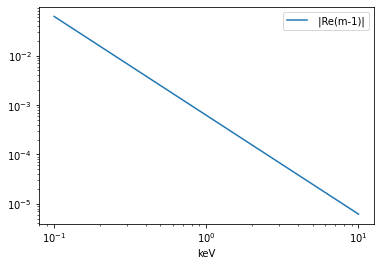

In [4]:
cm_drude = composition.CmDrude()

# The imaginary part should be zero -- no absorption
assert np.all(cm_drude.imvals == 0)

# Use the built-in plotting method to plot the real and imaginary part
# In this case, nothing will appear for the imaginary component because
# log(0) = -inf, so we will just skip it by setting impart=False

ax = plt.subplot(111)
cm_drude.plot(ax, ENERGY, impart=False)
plt.loglog()

[]

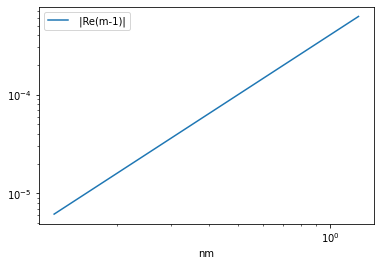

In [5]:
# Change the x-axis units to some other unit
ax = plt.subplot(111)
cm_drude.plot(ax, xunit='nm', impart=False)
plt.loglog()

## Complex index of refraction for silicate and graphite

These proprties were formulated by Draine (2003)

### Silicate

[]

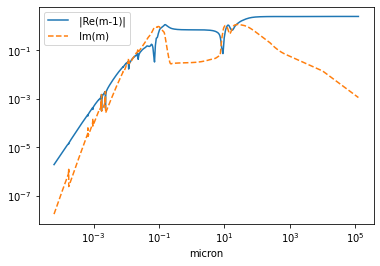

In [6]:
# Load the silicate properties and plot them
cm_silicate = composition.CmSilicate()

# I can plot the complex index of refraction without specifying an energy or wavelength grid
# This shows the raw data provided by Draine (2003)
ax = plt.subplot(111)
cm_silicate.plot(ax)
plt.loglog()

[]

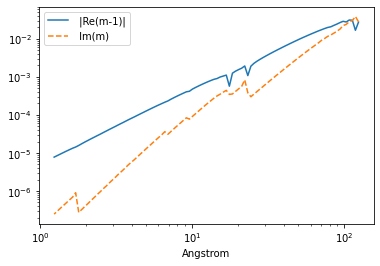

In [12]:
# Now I can plot the real and imaginary parts interpolated on a new energy grid
ax = plt.subplot(111)
cm_silicate.plot(ax, lam=ENERGY, xunit='Angstrom')
plt.loglog()

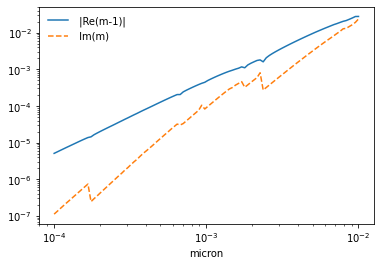

In [8]:
# Or I can plot them on a new wavelength grid
ax = plt.subplot(111)
cm_silicate.plot(ax, lam=LAMBDA)
plt.loglog()
plt.legend(loc='upper left', frameon=False)

### Graphite

(2.1246341027137867e-05, 361757.16647787386)

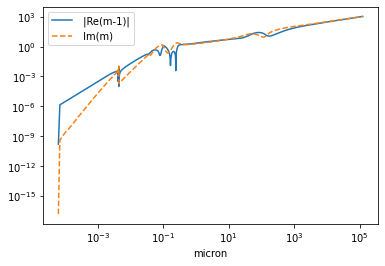

In [9]:
# Now do the same for graphite
gtest = composition.CmGraphite()

# Plot the default values
ax = plt.subplot(111)
gtest.plot(ax)
plt.loglog()
plt.xlim()

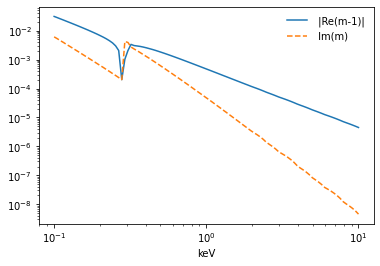

In [11]:
# Now interpolate it onto an energy grid
ax = plt.subplot(111)
gtest.plot(ax, lam=ENERGY, xunit='keV')
plt.loglog()
plt.legend(loc='upper right', frameon=False)